<a href="https://colab.research.google.com/github/SurekhaBerlin/Python/blob/main/Churn_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Telecom Customer Churn**

> Predicting Telecom Customer Churn and Conducting a case study of the Analysis is the purpose of this assignment




In [ ]:
# Importing all required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
# Reading the data

telco_base_data = pd.read_csv("/content/Customer-Churn.csv")

In [ ]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

 telco_base_data.describe() method to find the descriptive statistics (mean, median, maximum, minimum, standard deviation, count, etc.) of the data frame.

In [ ]:
# Check the descriptive statistics of numeric variables

telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco_base_data.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:


telco_base_data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:

telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see our data consist of 7043 rows and 21 columns which makes it quite small dataset. The variables are in an object type except for SeniorCitizen , tenure are both int64 and MonthlyCharges has a float64 type.if needed we can change the datatypes (e.g. the column Total Charges is identified as an object or string type data but it is actually a float type data, so we will have to change it) to perform relevant operations.

In [ ]:
#changing the datatype
telco_base_data.TotalCharges = pd.to_numeric(telco_base_data.TotalCharges,errors= 'coerce')

To change the datatype of  the column Total Charges is identified as an object type data but it is actually a float type data, so we are changing it to float type to perform relevant operations.

In [ ]:
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
telco_base_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

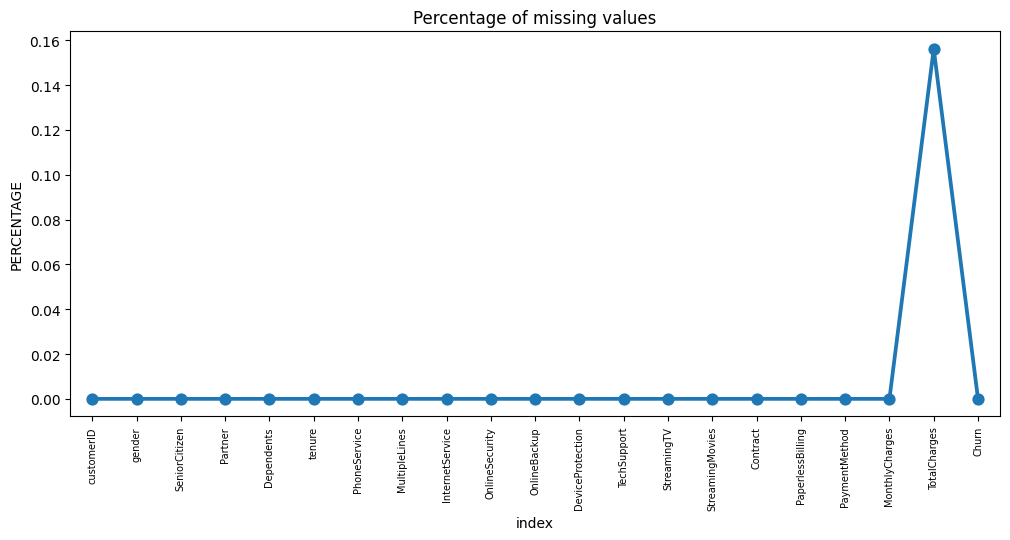

In [ ]:
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize = (12,5))
ax = sns.pointplot(x = 'index', y = 0,data = missing)
plt.xticks(rotation = 90 , fontsize = 7)
plt.title("Percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
#Removing null/missing values
telco_base_data.dropna(how = 'any', inplace = True)

In [ ]:
telco_base_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
len(telco_base_data)

7032

In [ ]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Missing Value Treatment

*   Since the percentage of these records compared to the total dataset is very low i.e. 0.15% it is safe to ignore them or drop them from further processing
*   Incase you want to treat them, you can use mean() or median() to treat them  




Divide the Tenure

* Divide the data into bins based on tenure for eg tenure<12months, assume a tenure group of 0-12 and then 12-24 and so on.....








In [ ]:
telco_base_data.tenure.min()


1

In [ ]:
telco_base_data.tenure.max()

72

In [ ]:
telco_base_data.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

In [ ]:
# Group the tenure into bins of 12 months

labels = ["{0} - {1}".format(i, i+11) for i in range(1,72,12)]
telco_base_data['tenure_group'] = pd.cut(telco_base_data.tenure,range(1,80,12),right = False , labels = labels)

In [ ]:
telco_base_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [ ]:
telco_base_data.drop(columns = ['customerID','tenure'],inplace = True)

Data Exploration - EDA


Categorical Univarite Analyses


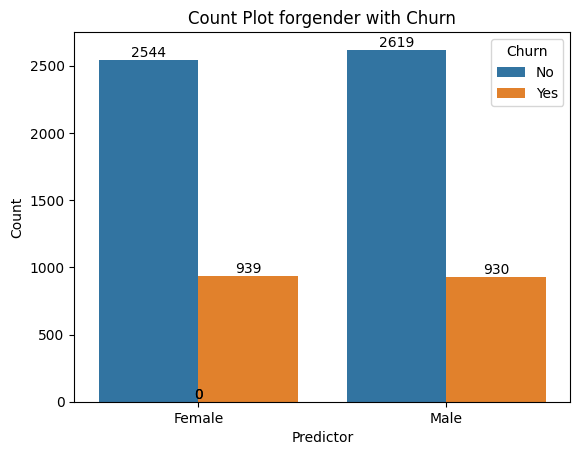

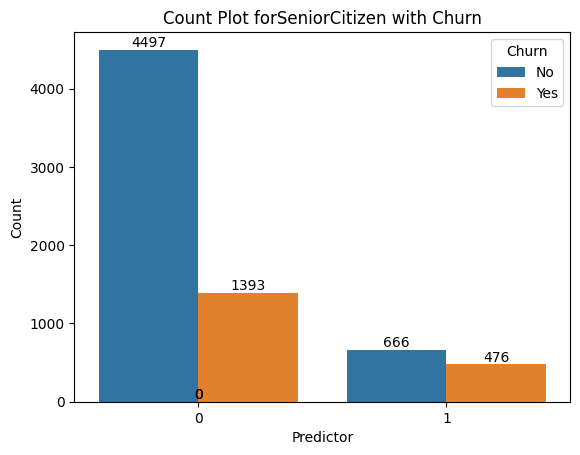

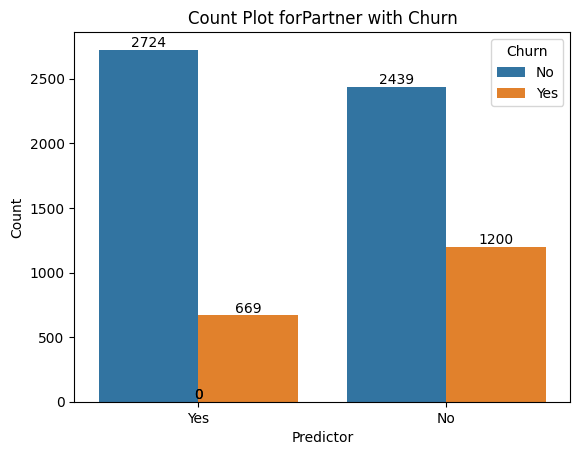

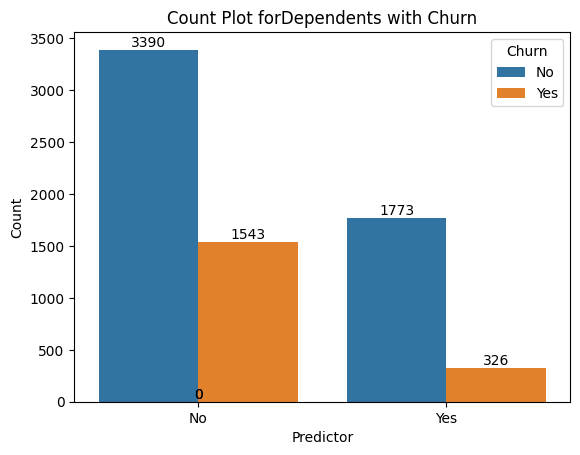

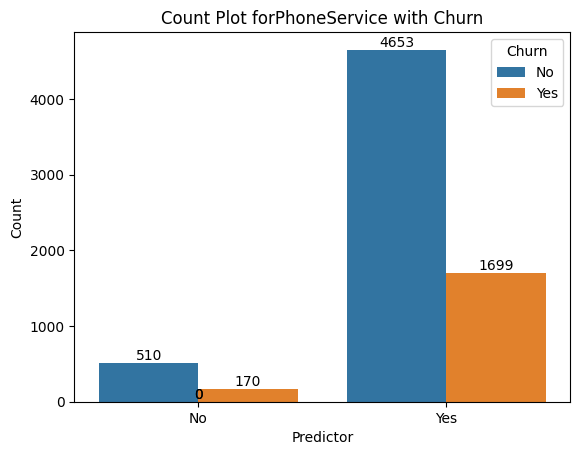

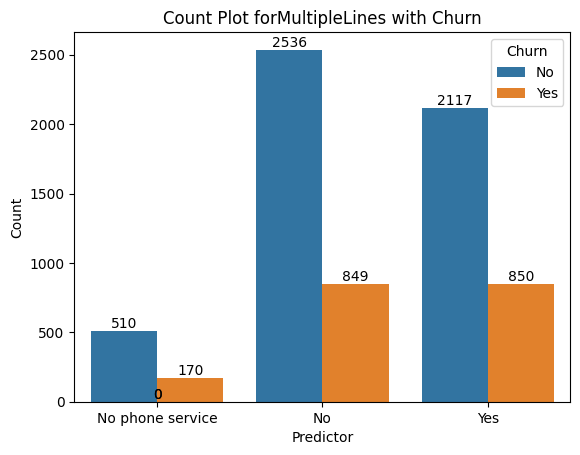

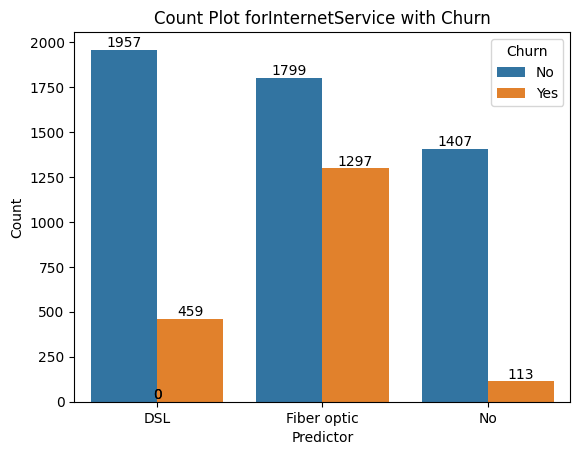

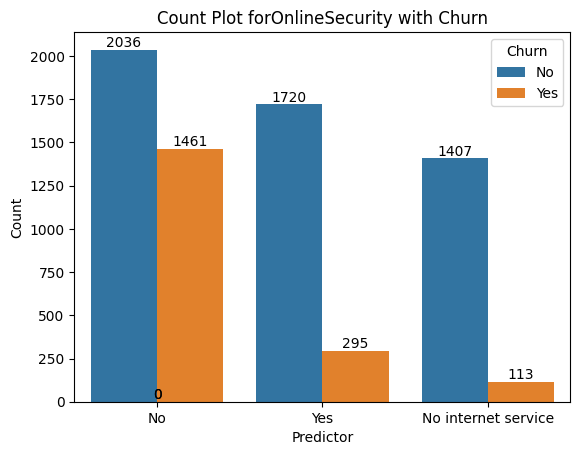

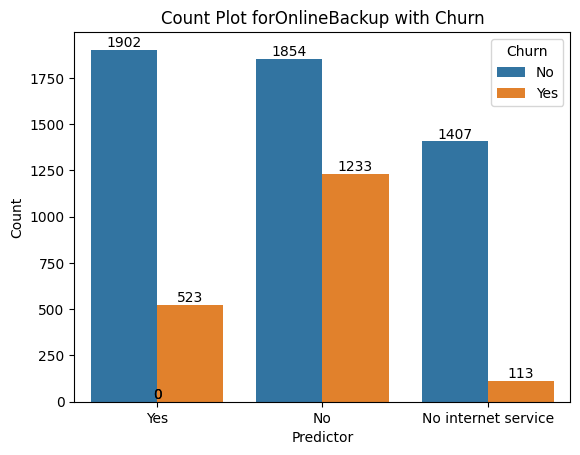

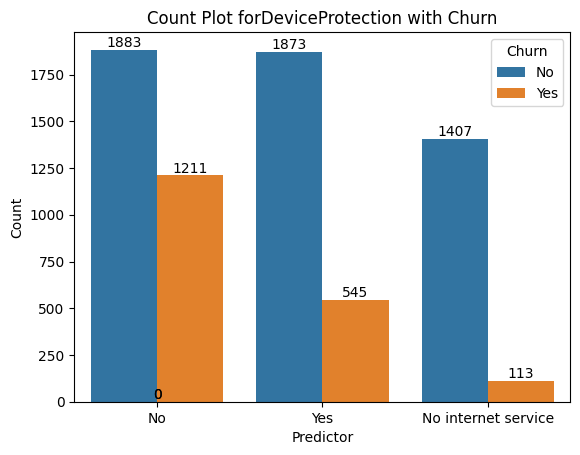

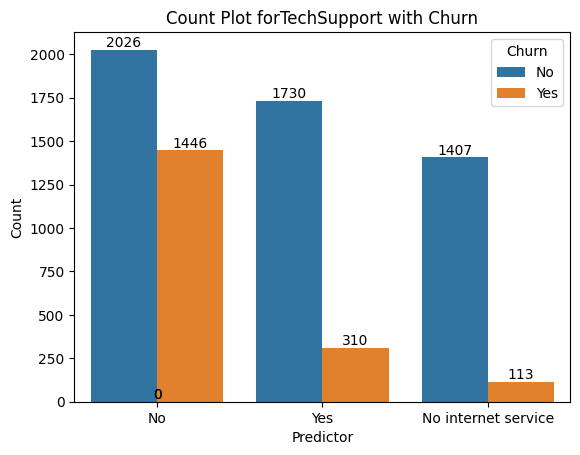

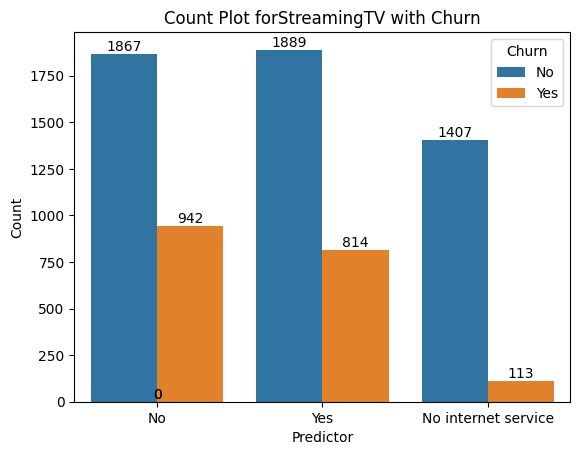

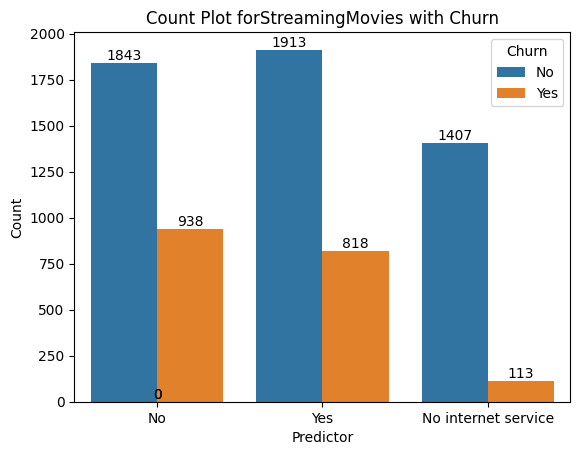

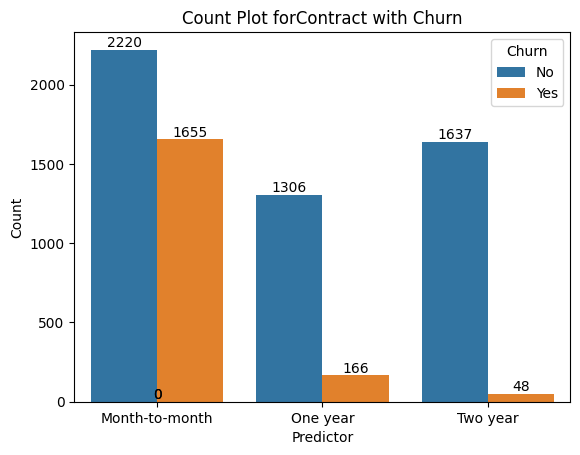

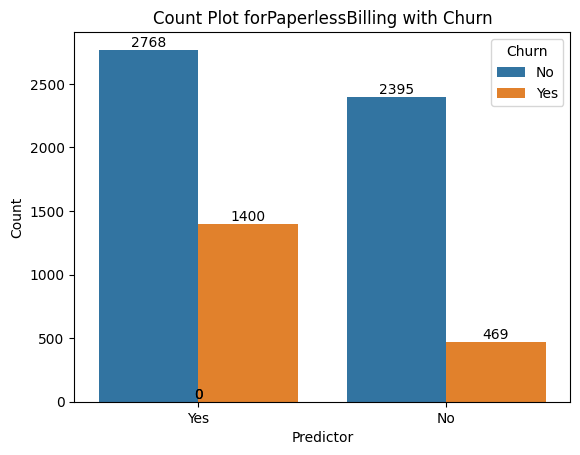

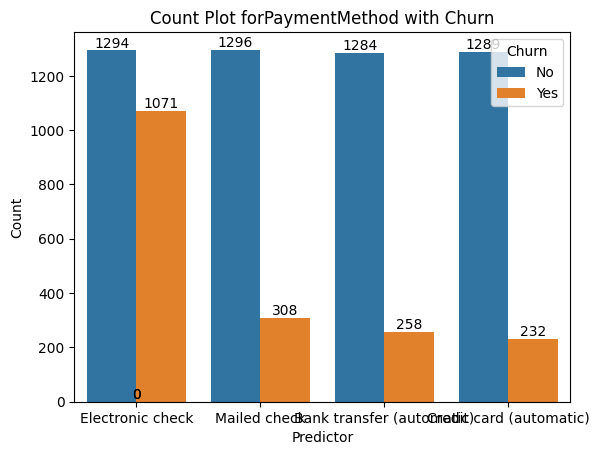

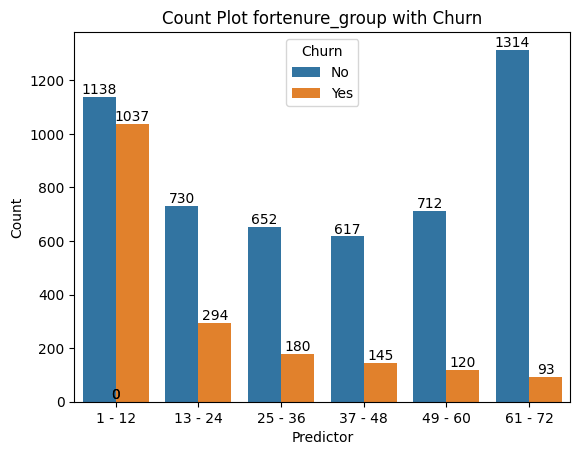

In [ ]:
# Iterate through the predictors and create count plots with labels
for i, predictor in enumerate(telco_base_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    ax = sns.countplot(data=telco_base_data, x=predictor, hue='Churn')

    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    ax.set_xlabel('Predictor')  # Set x-axis label
    ax.set_ylabel('Count')  # Set y-axis label
    ax.set_title('Count Plot for'+ predictor + ' with Churn')  # Set plot title
    plt.show()

Numerical Univariate Analysis


Text(0.5, 1.0, 'Monthly Charges by Churn')

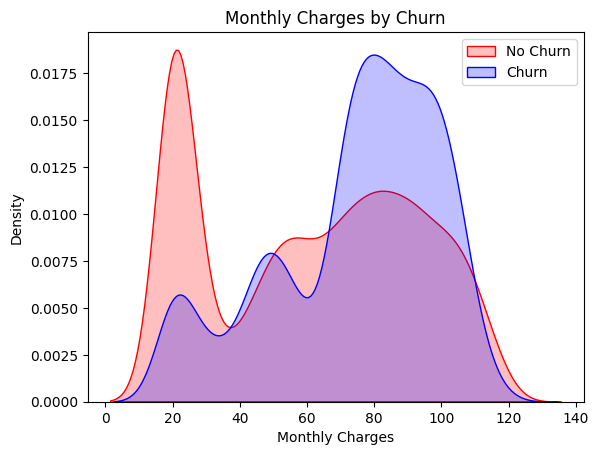

In [ ]:
MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "No")], color = 'Red', fill ="True")
MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "Yes")], color = 'Blue', fill ="True")
MonthlyCharges.legend(labels =['No Churn','Churn'], loc = 'upper right')
MonthlyCharges.set_ylabel('Density')
MonthlyCharges.set_xlabel('Monthly Charges')
MonthlyCharges.set_title("Monthly Charges by Churn")

Text(0.5, 1.0, 'Total Charges by Churn')

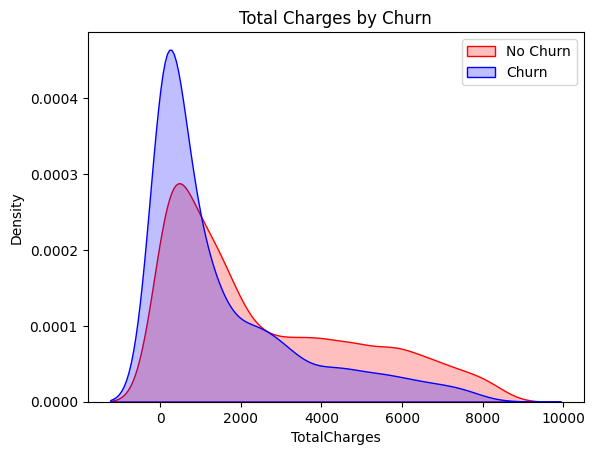

In [ ]:
TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "No")], color = 'Red', fill ="True")
TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "Yes")], color = 'Blue', fill ="True")
TotalCharges.legend(labels =['No Churn','Churn'], loc = 'upper right')
TotalCharges.set_ylabel('Density')
TotalCharges.set_xlabel('TotalCharges')
TotalCharges.set_title('Total Charges by Churn')

In [ ]:
telco_base_data.MonthlyCharges.corr(telco_base_data.TotalCharges)
# ~ +1 -------> Positive Correlation
# ~ -1 -------> Negative Correlation
# ~ 0 -------> No or Less Correlation

0.6510648032262027

In [ ]:
telco_dummies = pd.get_dummies(telco_base_data)
telco_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,1,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,1,0,0,1,1,0,0,0,0,0


In [ ]:
telco_base_data['Churn'] = np.where(telco_base_data.Churn == 'Yes' , 1, 0)

Categorical Data to Numerical Data

In [ ]:
telco_dummies = pd.get_dummies(telco_base_data)
telco_dummies.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Plotting th ecorrelationplot of the entire data w.r.t Churn

<Axes: >

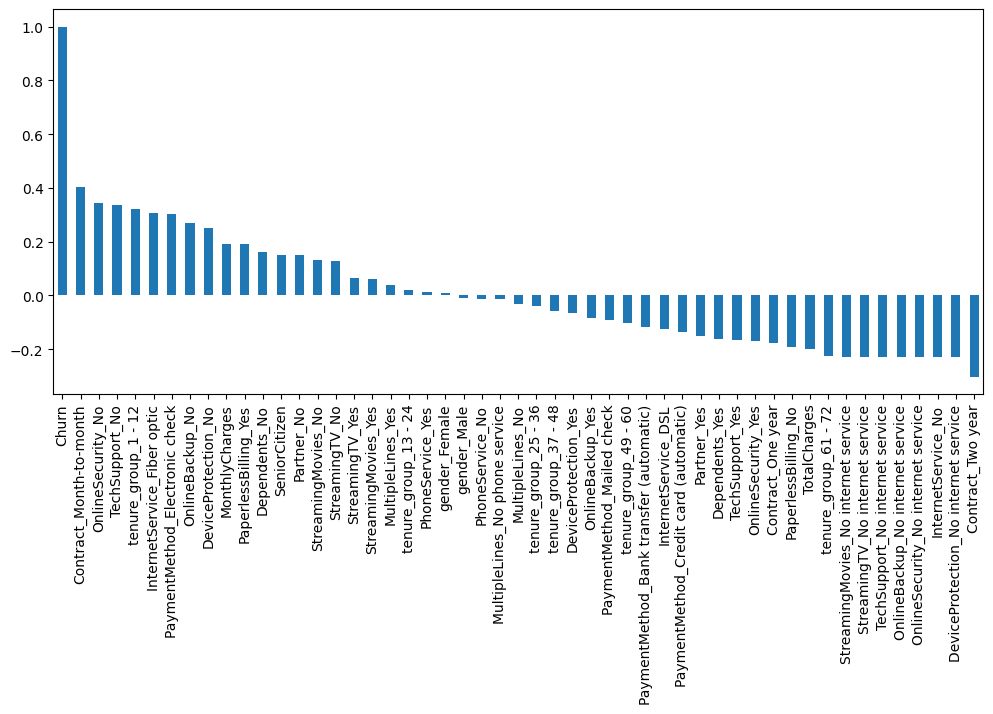

In [ ]:
plt.figure(figsize = (12,5))

telco_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

Bivariate analysis


In [ ]:
new_df1_target0=telco_base_data.loc[telco_base_data["Churn"]==0]
new_df1_target1=telco_base_data.loc[telco_base_data["Churn"]==1]

In [ ]:
def uniplot(df,col,title,hue =None):
    # Size of the graph
    plt.figure(figsize=(10,6))
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')
    # Adjust the size of the hue
    if hue:
      ax.legend(fontsize = 'small')

    plt.show()

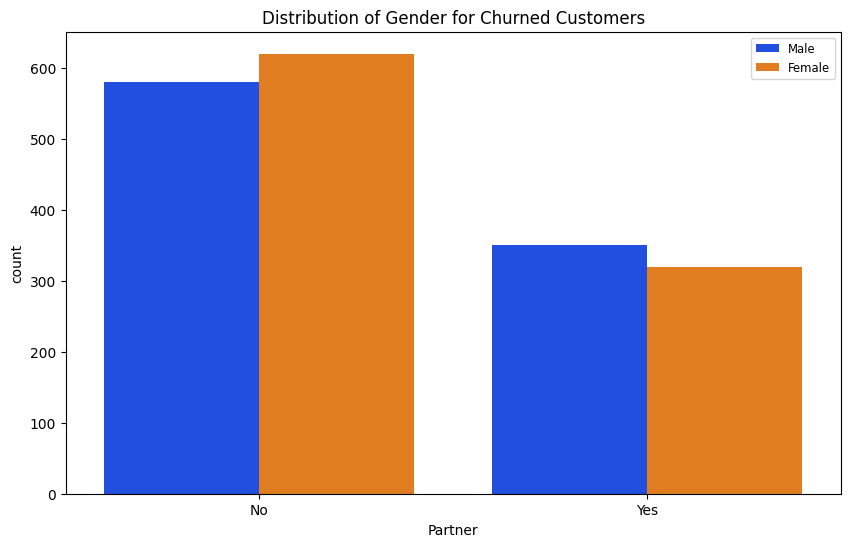

In [ ]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

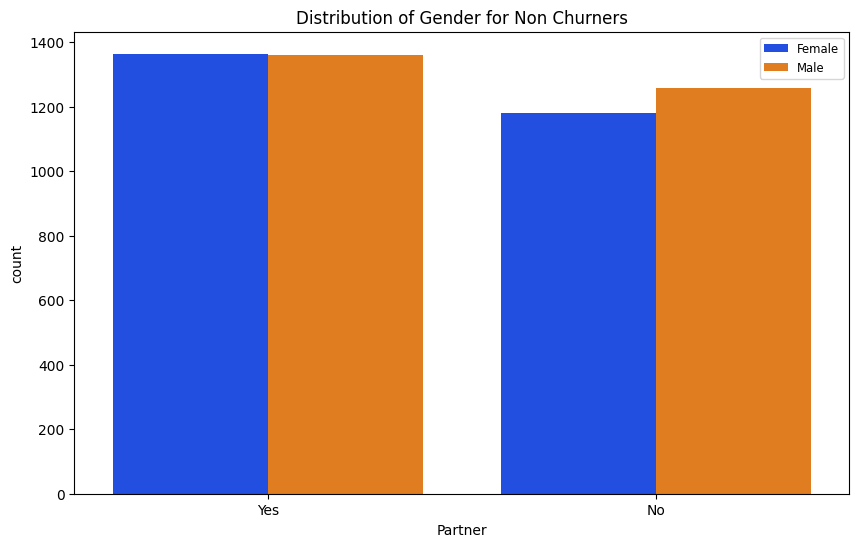

In [ ]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churners',hue='gender')

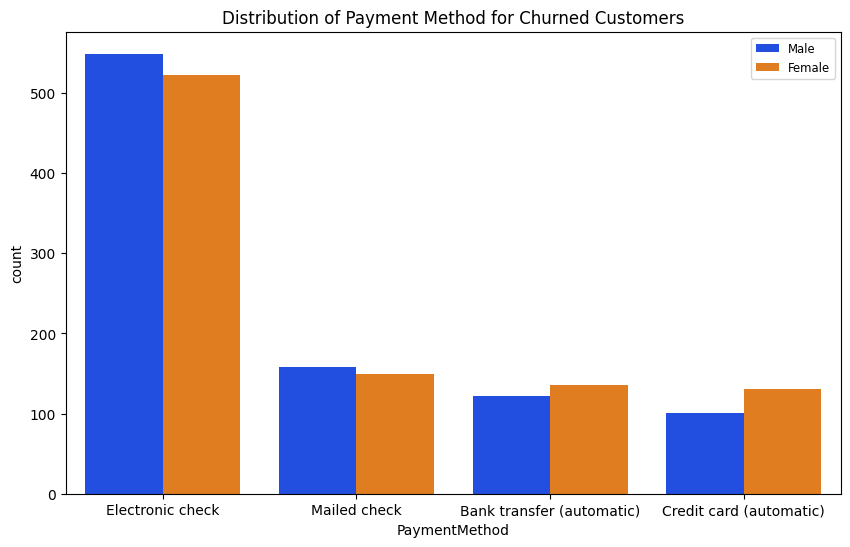

In [ ]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of Payment Method for Churned Customers',hue='gender')

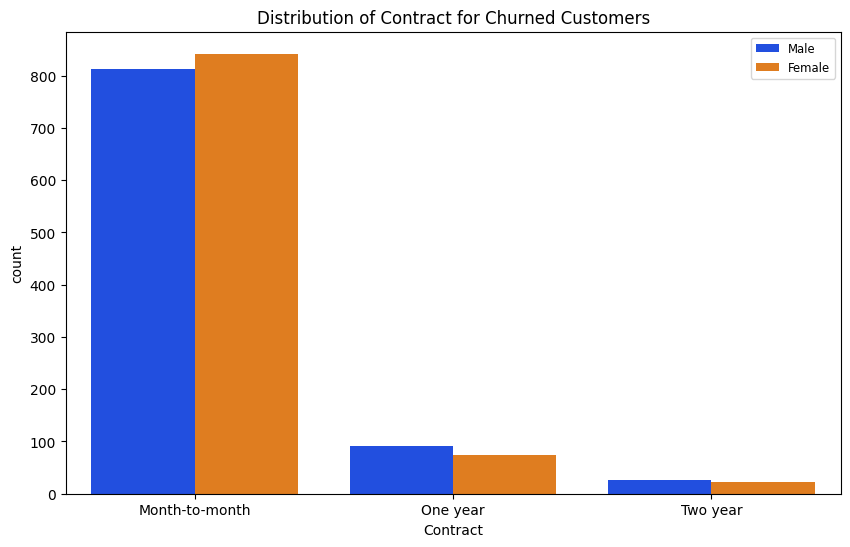

In [ ]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

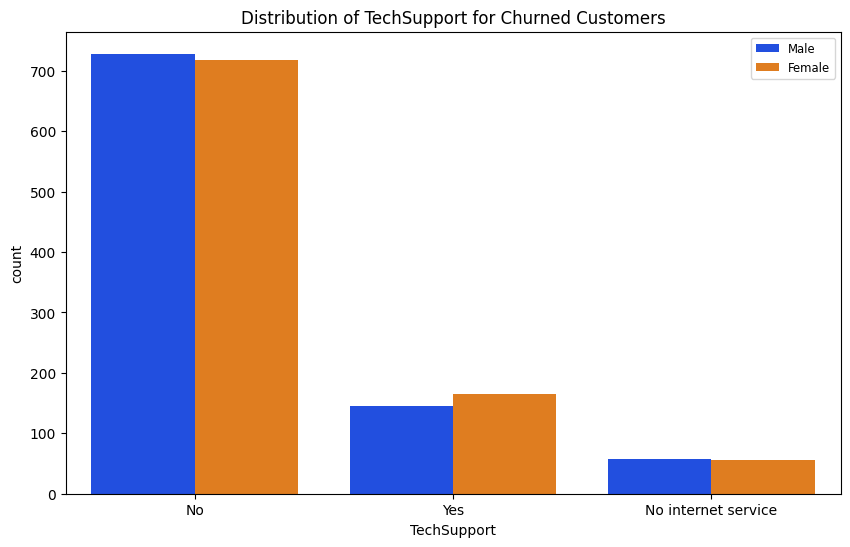

In [ ]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

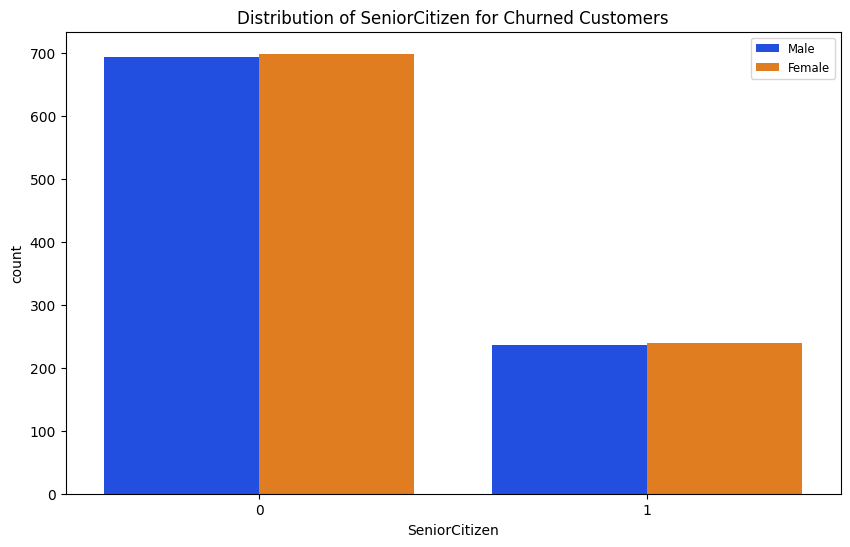

In [ ]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

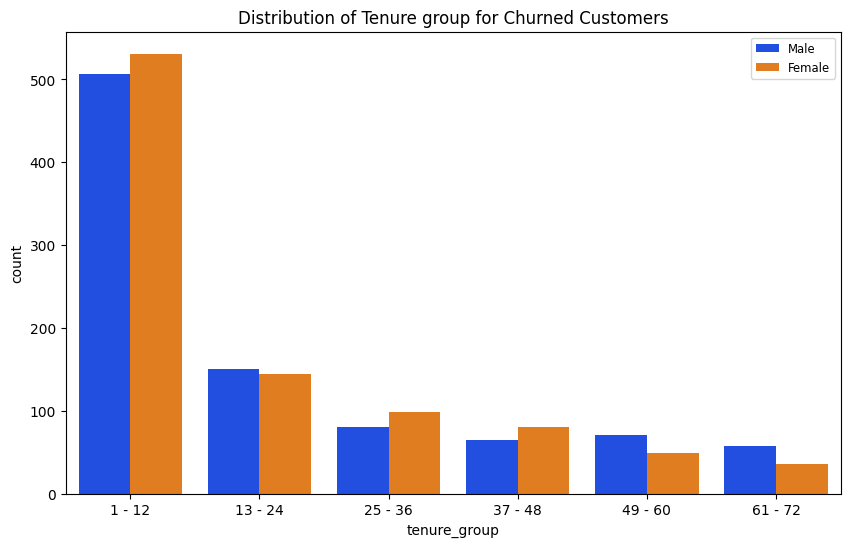

In [ ]:
uniplot(new_df1_target1,col='tenure_group',title='Distribution of Tenure group for Churned Customers',hue='gender')

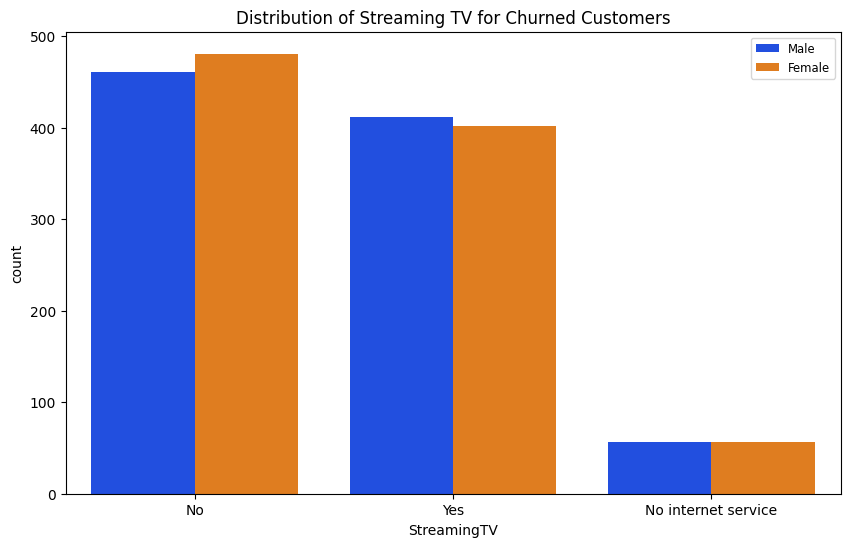

In [ ]:
uniplot(new_df1_target1,col='StreamingTV',title='Distribution of Streaming TV for Churned Customers',hue='gender')

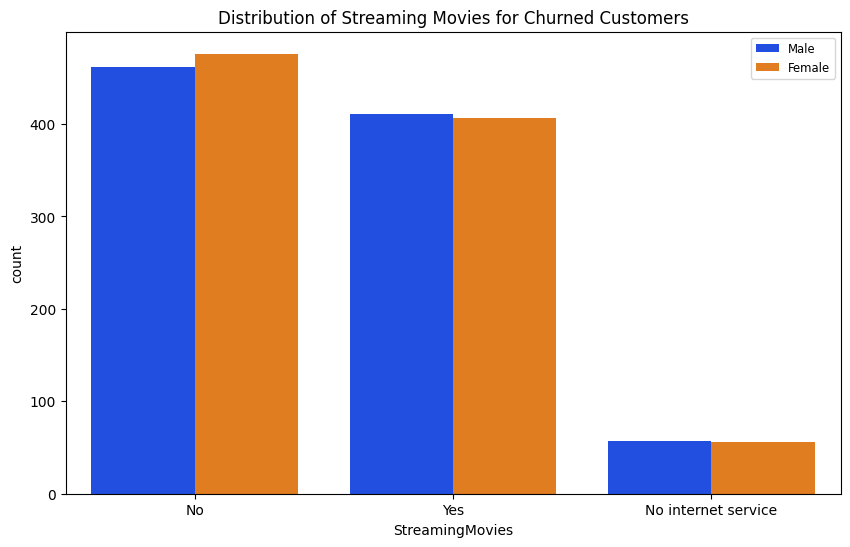

In [ ]:
uniplot(new_df1_target1,col='StreamingMovies',title='Distribution of Streaming Movies for Churned Customers',hue='gender')

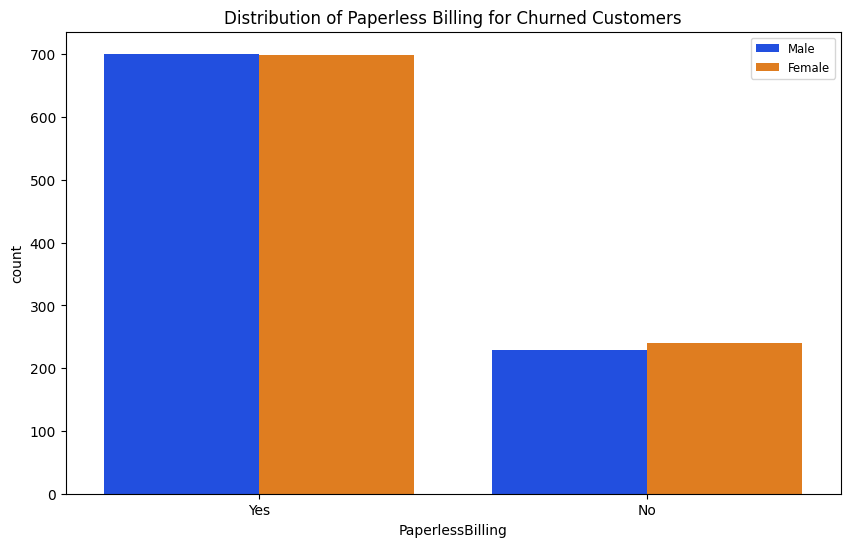

In [ ]:
uniplot(new_df1_target1,col='PaperlessBilling',title='Distribution of Paperless Billing for Churned Customers',hue='gender')

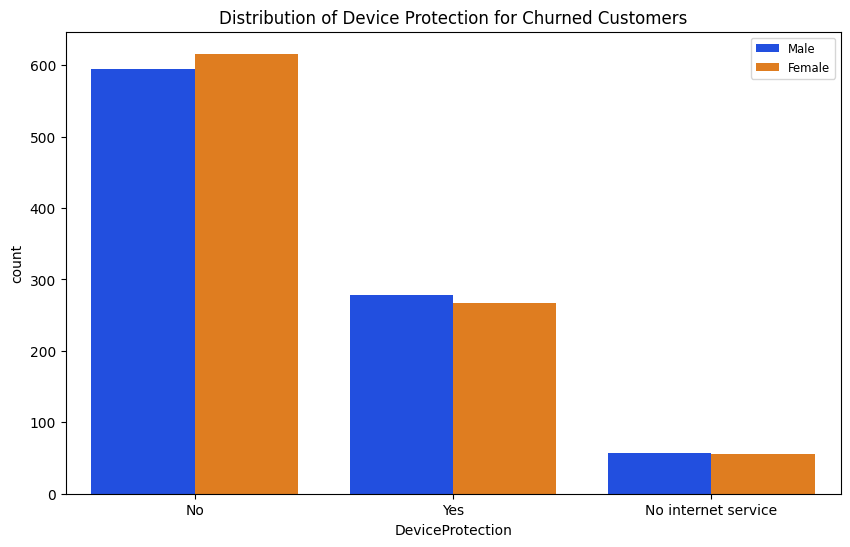

In [ ]:
uniplot(new_df1_target1,col='DeviceProtection',title='Distribution of Device Protection for Churned Customers',hue='gender')

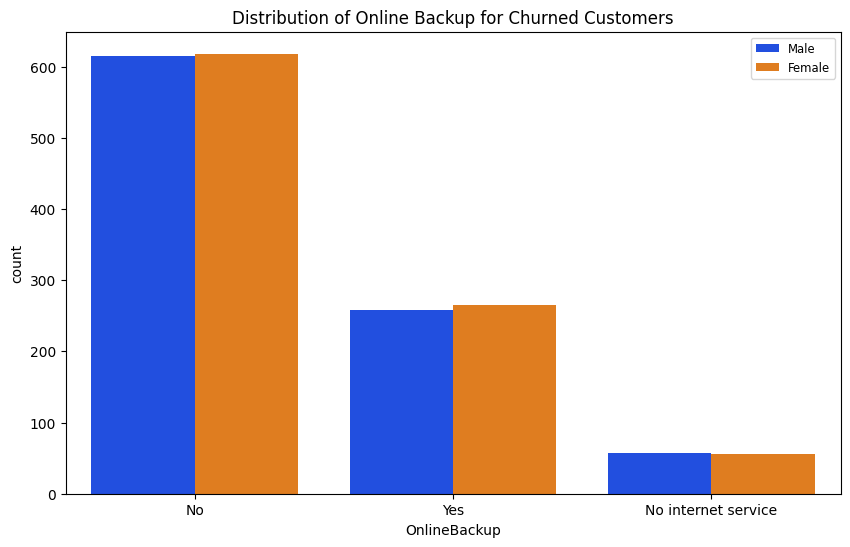

In [ ]:
uniplot(new_df1_target1,col='OnlineBackup',title='Distribution of Online Backup for Churned Customers',hue='gender')

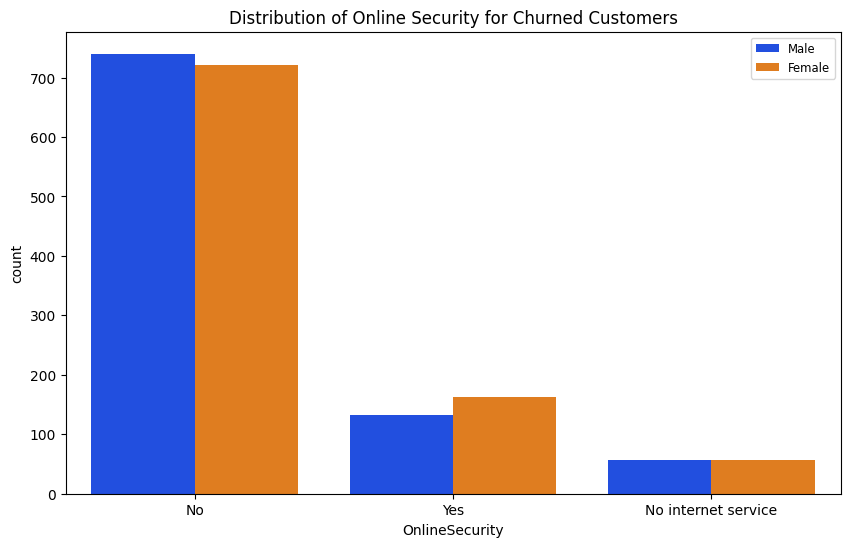

In [ ]:
uniplot(new_df1_target1,col='OnlineSecurity',title='Distribution of Online Security for Churned Customers',hue='gender')

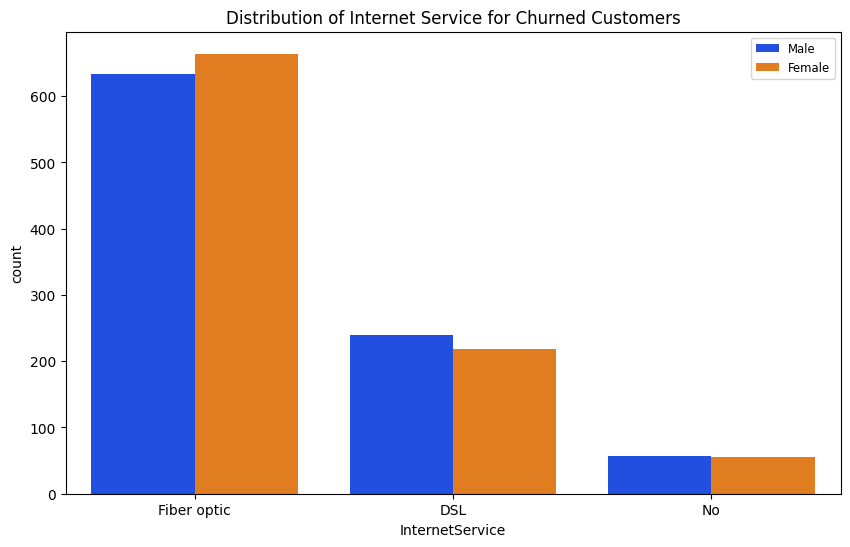

In [ ]:
uniplot(new_df1_target1,col='InternetService',title='Distribution of Internet Service for Churned Customers',hue='gender')

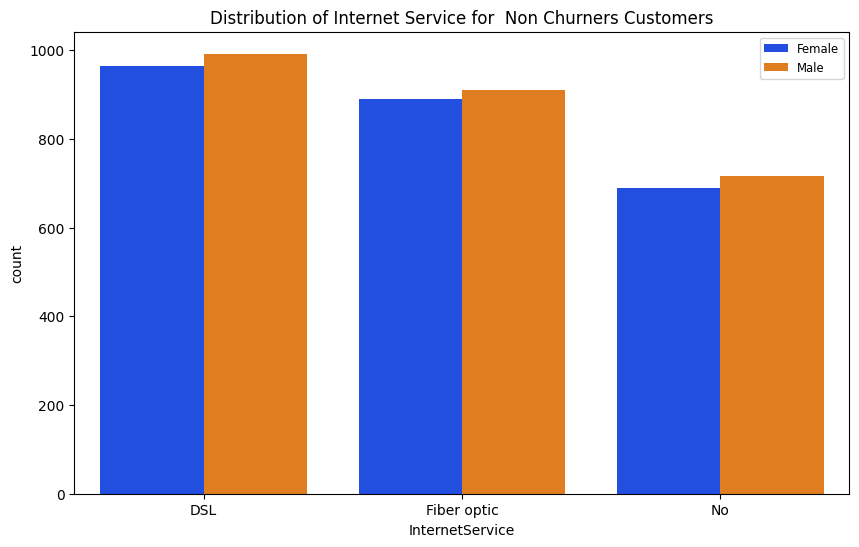

In [ ]:
uniplot(new_df1_target0,col='InternetService',title='Distribution of Internet Service for  Non Churners Customers',hue='gender')